In [1]:
!pip install pandas
!pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [77]:
#Q1
df = pd.read_csv('nutrition-drinks.csv')

In [4]:
#top 5 entries
df.head(5)

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [5]:
#bottom 5 entries
df.tail(5)

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
172,Chocolate Smoothie,320,5,53,8,20,170
173,Strawberry Smoothie,300,2,60,7,16,130
174,Ginger Ale,-,-,-,-,-,-
175,Lemon Ale,-,-,-,-,-,-
176,Orange Cream Soda,-,-,-,-,-,-


In [6]:
#number of rows and columns
df.shape

(177, 7)

In [7]:
#unique entries and number of unique entries in each column
i=0
for c in df.columns:
    print("Unique values in column", i, "(", df.columns[i], "): ")
    print(df[df.columns[i]].unique())
    print("Number of unique values in column", i, "(", df.columns[i], "):", df[df.columns[i]].nunique())
    print("\n")
    i= i+1

Unique values in column 0 ( Unnamed: 0 ): 
['Cool Lime Starbucks Refreshers™ Beverage' 'Ombré Pink Drink'
 'Pink Drink' 'Strawberry Acai Starbucks Refreshers™ Beverage'
 'Very Berry Hibiscus Starbucks Refreshers™ Beverage' 'Violet Drink'
 'Evolution Fresh™ Cold-Pressed Apple Berry Juice'
 'Evolution Fresh™ Defense Up' 'Evolution Fresh™ Organic Ginger Limeade'
 'Iced Coffee' 'Iced Coffee with Milk'
 'Iced Espresso Classics - Vanilla Latte'
 'Iced Espresso Classics - Caffe Mocha'
 'Iced Espresso Classics - Caramel Macchiato'
 'Starbucks® Caramel Iced Coffee' 'Starbucks® Iced Coffee + Milk'
 'Starbucks® Low Calorie Iced Coffee + Milk'
 'Starbucks® Vanilla Iced Coffee' 'Shaken Sweet Tea'
 'Tazo® Bottled Berry Blossom White' 'Tazo® Bottled Black Mango'
 'Tazo® Bottled Black with Lemon' 'Tazo® Bottled Brambleberry'
 'Tazo® Bottled Giant Peach' 'Tazo® Bottled Iced Passion'
 'Tazo® Bottled Lemon Ginger' 'Tazo® Bottled Organic Black Lemonade'
 'Tazo® Bottled Organic Iced Black Tea'
 'Tazo® Bott

In [8]:
#Q2 finding the data type of each column
i=0
for c in df.columns:
    print("Data type in column", i, "(", df.columns[i], "): ", df[df.columns[i]].dtypes)
    i= i+1

Data type in column 0 ( Unnamed: 0 ):  object
Data type in column 1 ( Calories ):  object
Data type in column 2 ( Fat (g) ):  object
Data type in column 3 ( Carb. (g) ):  object
Data type in column 4 ( Fiber (g) ):  object
Data type in column 5 ( Protein ):  object
Data type in column 6 ( Sodium ):  object


Right now, all of the columns have the object data type displayed because of the empty cells containing dashes. However upon cleaning, the column containing the beverage name is a nominal categorical variable making the composite key of the dataset. The rest of the column all contain discrete quantitative data or integer values, other than the fat content column which contains continuous float values.

In [11]:
#Q3 find the null values in each column
df.isnull().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

In [73]:
#cleaning/removing cells with hyphens (no data)
df_new = df[~df.isin(['-']).any(axis=1)]
df_new

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0,0,5
9,Iced Coffee,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159,Mocha Light Frappuccino® Blended Coffee,140,0.5,28,1,4,180
168,Cinnamon Dolce Crème,200,6,28,0,10,135
171,Vanilla Crème,200,6,28,0,10,135
172,Chocolate Smoothie,320,5,53,8,20,170


In [74]:
#Q4 rename 3 columns
df_new= df_new.rename(columns={'Unnamed: 0':'Beverage_name', 'Fat (g)':'Total Fat (g)', 'Protein':'Protein (g)'})

#drop 2 columns
df_new= df_new.drop(columns=['Fiber (g)', 'Sodium'])
df_new

,Beverage_name,Calories,Total Fat (g),Carb. (g),Protein (g)
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,0
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,0
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0
9,Iced Coffee,0,0,0,0
...,...,...,...,...,...
159,Mocha Light Frappuccino® Blended Coffee,140,0.5,28,4
168,Cinnamon Dolce Crème,200,6,28,10
171,Vanilla Crème,200,6,28,10
172,Chocolate Smoothie,320,5,53,20


I chose to drop the fiber and sodium columns as I thought that these two components were mostly unimportant in most drinks and sodium was found in very small quantities in milligrams.

In [88]:
#Q5 find minimum, maximum, mean, standard deviation, variance and sum of each column
df_new = df_new.apply(pd.to_numeric, errors='coerce')
i=0
num_col= ['Calories', 'Total Fat (g)', 'Carb. (g)', 'Protein (g)']
for x in num_col:
    min= df_new[num_col[i]].min()
    print("The minimum value in", num_col[i], "is", min)
    max= df_new[num_col[i]].max()
    print("The maximum value in", num_col[i], "is", max)
    mean= df_new[num_col[i]].mean()
    print("The mean value in", num_col[i], "is", mean)
    std= df_new[num_col[i]].std()
    print("The standard deviation in", num_col[i], "is", std)
    var= df_new[num_col[i]].var()
    print("The variance in", num_col[i], "is", var)
    sum= df_new[num_col[i]].sum()
    print("The sum of the values in", num_col[i], "is", sum)
    print("\n")
    i+=1

The minimum value in Calories is 0
The maximum value in Calories is 430
The mean value in Calories is 135.16304347826087
The standard deviation in Calories is 93.85355405213949
The variance in Calories is 8808.48960821787
The sum of the values in Calories is 12435


The minimum value in Total Fat (g) is 0.0
The maximum value in Total Fat (g) is 26.0
The mean value in Total Fat (g) is 2.3369565217391304
The standard deviation in Total Fat (g) is 3.8879277056348047
The variance in Total Fat (g) is 15.115981844242716
The sum of the values in Total Fat (g) is 215.0


The minimum value in Carb. (g) is 0
The maximum value in Carb. (g) is 64
The mean value in Carb. (g) is 24.73913043478261
The standard deviation in Carb. (g) is 15.214849286009592
The variance in Carb. (g) is 231.4916387959866
The sum of the values in Carb. (g) is 2276


The minimum value in Protein (g) is 0
The maximum value in Protein (g) is 20
The mean value in Protein (g) is 4.1521739130434785
The standard deviation in Pro

In [78]:
#Q6 randomly sample 25% 4 times in 4 subsets
sample_size = int(len(df_new) * .25)
df_sample1 = df_new.sample(sample_size)
df_new_remaining = df_new.drop(df_sample1.index)

df_sample2 = df_new_remaining.sample(sample_size)
df_new_remaining = df_new_remaining.drop(df_sample2.index)

df_sample3 = df_new_remaining.sample(sample_size)
df_new_remaining = df_new_remaining.drop(df_sample3.index)

df_sample4 = df_new_remaining

In [79]:
#first subset
print("Random subset 1: ")
df_sample1

Random subset 1: 


,Beverage_name,Calories,Total Fat (g),Carb. (g),Protein (g)
139,White Chocolate Mocha,360,11,53,14
126,Iced Caramel Macchiato,250,7,37,10
72,Starbucks® Iced Coffee Light Sweetened,50,0,11,1
113,Caffè Mocha,290,8,42,13
31,Tazo® Bottled White Cranberry,140,0,35,0
117,Cinnamon Dolce Latte,260,6,40,11
73,Starbucks® Iced Coffee Unsweetened,10,0,2,1
109,Hot Chocolate,320,9,47,14
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0
26,Tazo® Bottled Organic Black Lemonade,140,0,35,0


In [80]:
#second subset
print("Random subset 2: ")
df_sample2

Random subset 2: 


,Beverage_name,Calories,Total Fat (g),Carb. (g),Protein (g)
25,Tazo® Bottled Lemon Ginger,120,0,31,0
94,Blonde Roast,5,0,0,1
158,Mocha Frappuccino® Blended Coffee,280,2.5,60,4
39,Iced Espresso Classics - Vanilla Latte,130,2.5,21,5
38,Teavana® Shaken Iced Peach Green Tea,60,0,15,0
159,Mocha Light Frappuccino® Blended Coffee,140,0.5,28,4
124,Iced Caffè Latte,130,4.5,13,8
80,Tazo® Bottled Brambleberry,140,0,35,0
172,Chocolate Smoothie,320,5,53,20
9,Iced Coffee,0,0,0,0


In [81]:
#third subset
print("Random subset 3: ")
df_sample3

Random subset 3: 


,Beverage_name,Calories,Total Fat (g),Carb. (g),Protein (g)
78,Tazo® Bottled Black Mango,150,0,38,0
19,Tazo® Bottled Berry Blossom White,60,0,15,0
108,Vanilla Sweet Cream Cold Brew,110,6,14,1
98,Decaf Pike Place® Roast,5,0,0,1
87,Tazo® Bottled Plum Pomegranate,140,0,35,0
114,Cappuccino,120,4,12,8
11,Iced Espresso Classics - Vanilla Latte,130,2.5,21,5
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,0
102,Nariño 70 Cold Brew,5,0,0,0
71,Starbucks® Iced Coffee Caramel,60,0,13,1


In [82]:
#fourth subset
print("Random subset 4: ")
df_sample4

Random subset 4: 


,Beverage_name,Calories,Total Fat (g),Carb. (g),Protein (g)
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0
12,Iced Espresso Classics - Caffe Mocha,140,2.5,23,5
20,Tazo® Bottled Black Mango,150,0,38,0
23,Tazo® Bottled Giant Peach,150,0,37,0
28,Tazo® Bottled Organic Iced Green Tea,120,0,31,0
32,Teavana® Shaken Iced Black Tea,30,0,8,0
33,Teavana® Shaken Iced Black Tea Lemonade,70,0,17,0
35,Teavana® Shaken Iced Green Tea Lemonade,70,0,17,0
40,Iced Espresso Classics - Caffe Mocha,140,2.5,23,5
77,Tazo® Bottled Berry Blossom White,60,0,15,0


In [83]:
!pip install matplotlib
!pip install seaborn

In [84]:
#Q7
import matplotlib.pyplot as plt
import seaborn as sns

(array([14., 17., 11., 24., 10.,  5.,  6.,  2.,  2.,  1.]),
 array([  0.,  43.,  86., 129., 172., 215., 258., 301., 344., 387., 430.]),
 <BarContainer object of 10 artists>)

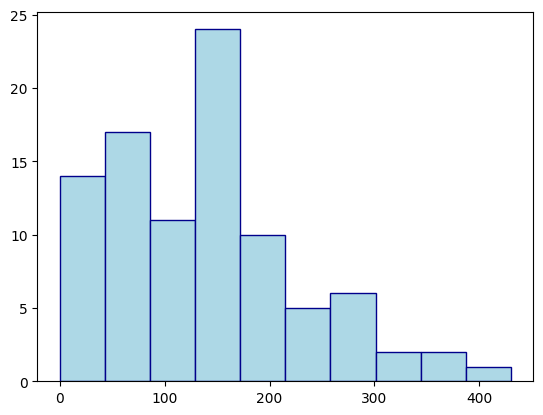

In [90]:
#create a histogram for first column
plt.hist(df_new['Calories'], bins=10, color="lightblue", ec="darkblue")

(array([13.,  6., 19.,  8., 11., 25.,  2.,  3.,  2.,  3.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <BarContainer object of 10 artists>)

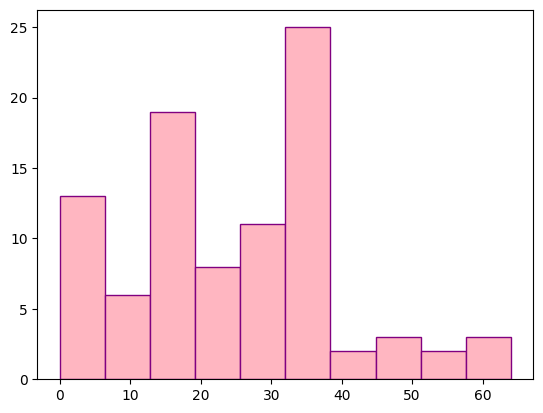

In [91]:
#create a histogram for the second column
plt.hist(df_new['Carb. (g)'], bins=10, color="lightpink", ec="purple")

/var/folders/qw/k7xdr0zs19g8n3n14vm6w1yh0000gn/T/ipykernel_51115/362956451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_new['Calories'], palette="Pastel2")


<Axes: ylabel='Calories'>

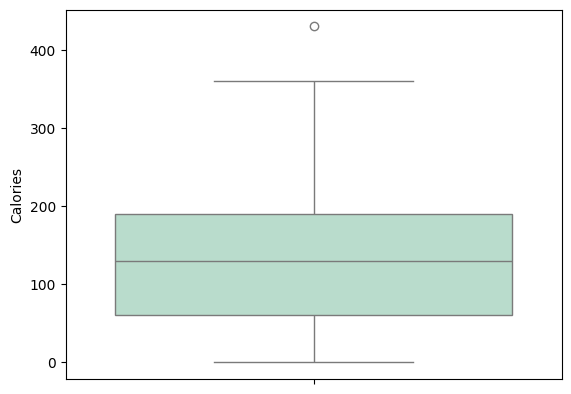

In [92]:
#create a boxplot for first column
sns.boxplot(df_new['Calories'], palette="Pastel2")

/var/folders/qw/k7xdr0zs19g8n3n14vm6w1yh0000gn/T/ipykernel_51115/1335436279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_new['Carb. (g)'], palette="Purples")


<Axes: ylabel='Carb. (g)'>

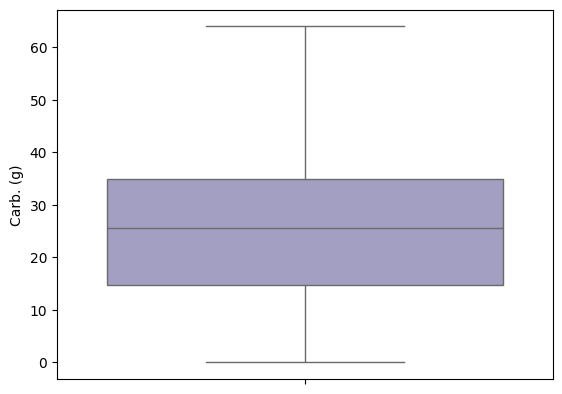

In [94]:
#create a boxplot for second column
sns.boxplot(df_new['Carb. (g)'], palette="Purples")